# Haberman Cancer Survival - EDA 

**Objective**: To classify patients status as survived(1) or not(2) 5 years post operation.

In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


In [3]:
#Reading the data
path = '/content/drive/MyDrive/colab_data/haberman.csv'
data = pd.read_csv(path)

In [4]:
data.shape

(306, 4)

In [5]:
#Having a look at the data
data.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The data contains 306 rows an 4 columns.
*age*, *year* and *nodes* are the **independent** variables and *status* is the **dependent** variable.

Attribute Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute)
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 year

In [6]:
data.isna().sum() #Checking if there are any null values

age       0
year      0
nodes     0
status    0
dtype: int64

There are no null or missing values in the data.

In [7]:
data.nunique()#Counting the number of unique values in the data

age       49
year      12
nodes     31
status     2
dtype: int64

We can say that we have a data of 12 diffferent calendar years.

#### High Level Statistics and Univariate Analysis

In [8]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
features = data.columns[:-1]
target = data.columns[-1]

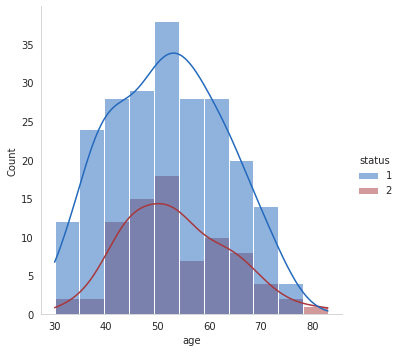

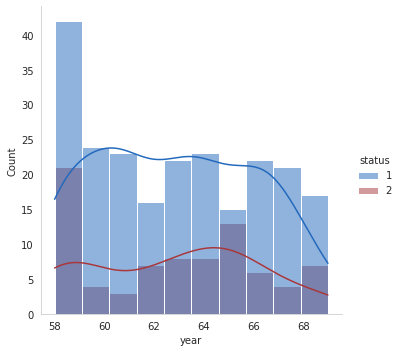

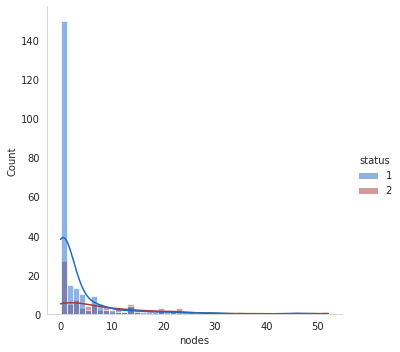

In [10]:
for feature in features:
    sns.set_style("whitegrid")
    sns.displot(data=data, x=feature, kde = True, hue= target, palette='vlag')
    plt.grid()
    plt.show()  

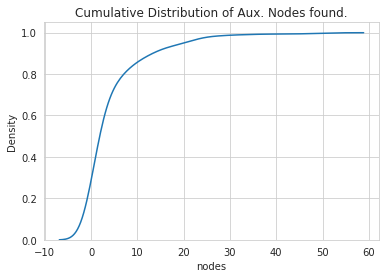

In [11]:
sns.kdeplot(data=data, x='nodes', cumulative = True)
plt.title("Cumulative Distribution of Aux. Nodes found.")
plt.show()

### Observations on univariate analysis

1.  High number of patients of age 45-65 years and the patients within 40-55 years of age fell under status 2 (died within 5 years of the operation).
2.  Patients under 40 had very few cases that fell under status 2.
3. Initially (in 1958) there were a huge number of patients but as time went on, we can see a dip in the number of patients (which could be due to various reasons like tech advancement, awareness etc.).
4. In 1964, the ratio of patients in status to status 2 was really poor and we can see the status2 curve climbing which indicates poor performance. 
5. While the min nodes found were 0 and the max was 50 but majority of the patients had none or 1 auxiliary nodes found. (Median = 1, Mean = 4.2) so we can expect the presence of outliers. [We can see that 80% of the dataset has <= 8 nodes.]
6. Patients with 0 aux. nodes found tend to live longer after the operation.
7. As number of auxiliary nodes increases, the more dangerous it gets for the patient, although there are few cases with high number of nodes.



However, using univariate analysis, the two target classes are not visually/linearly separable.

#### Bivariate Analysis

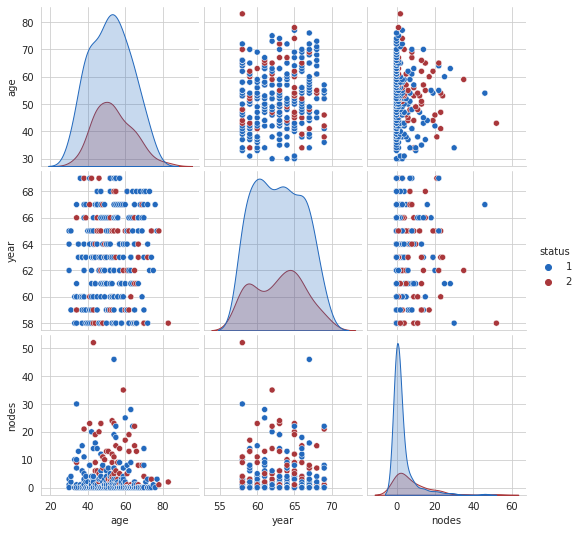

In [16]:
sns.pairplot(data = data, hue = 'status', palette='vlag')
plt.show()

The combination of features are not easily separable.

Plotting Box Plots and Violin Plots

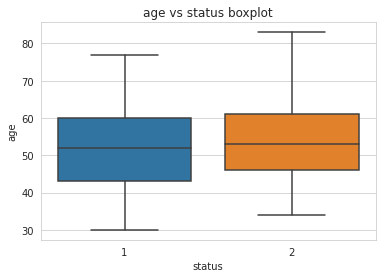

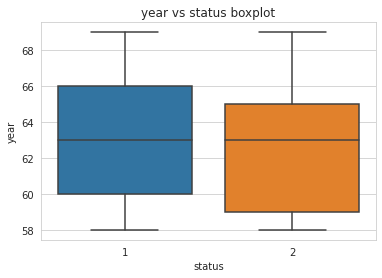

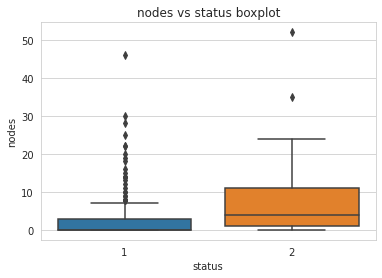

In [19]:
for feature in features:
    sns.boxplot(x=target, y = feature, data= data)
    plot_title = feature + ' vs ' + target + ' boxplot'
    plt.title(plot_title)
    plt.show()

One can see that the vertical overlap between the every feature vs target boxplot is huge. That means a lot of data points lie together and can't be separated. 

Nodes vs Status boxplot shows the least overlap which was already explained as most patients with status = 1 had less nodes and as the aux. nodes increased, the danger tends to increase and the more likely they are to falling in status = 2  group. Hence, there are some status 1 patients with high aux. nodes found as well.

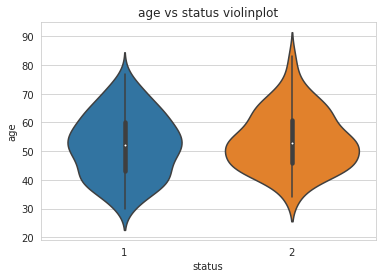

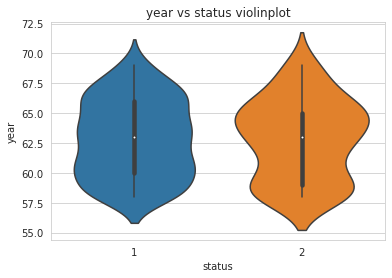

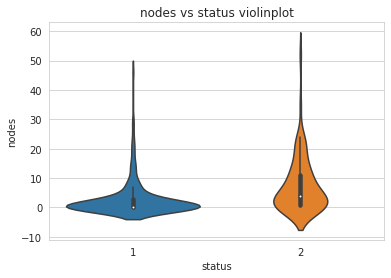

In [20]:
for feature in features:
    sns.violinplot(x=target, y = feature, data= data)
    plot_title = feature + ' vs ' + target + ' violinplot'
    plt.title(plot_title)
    plt.show()

Here, we can see the distrbution along with all the data that we could see in the boxplot.

Multivariate Analysis

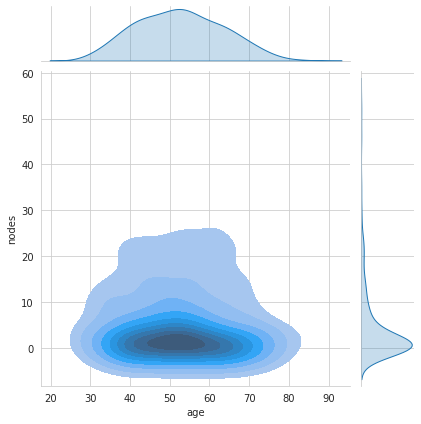

In [44]:
sns.jointplot(x = 'age', y = 'nodes', data = data, kind='kde', fill = True)
plt.show()

A large number of patients incoming were of age 40-60 with 0-1 aux nodes.

Patients with status 1

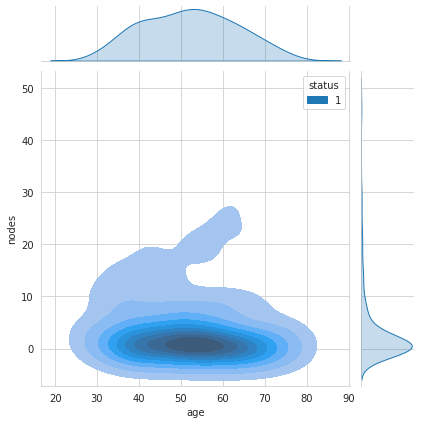

In [45]:
sns.jointplot(x = 'age', y = 'nodes', data = data[data.status == 1], kind='kde', hue = target, fill = True)
plt.show()

We have a good number of patients from status 1 of ages 30-70 and less aux. nodes.

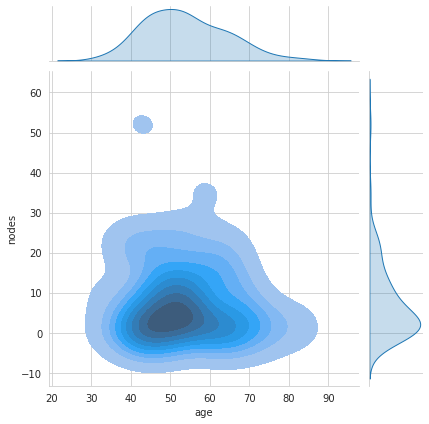

In [46]:
sns.jointplot(x = 'age', y = 'nodes', data = data[data.status == 2], kind='kde', fill = True)
plt.show()

40-60 age group had more status 2 patients. The status 2 patients were also likely to have a higher aux. node count.

Calculating Quantiles

In [56]:
for feature in ['age', 'nodes']:
    print(f"Quantiles of {feature} : ")
    min_f = data[feature].min()
    print(f"Min : {min_f}")
    quant = [1, 25, 50, 75, 99]
    q = np.percentile(data[feature], quant)
    for i,qx in enumerate(q):
        print(f'{quant[i]} percentile : {q[i]}')
    iqr = q[3] - q[1]
    max_f = data[feature].max()
    print(f"Max : {max_f}")
    print(f'IQR ({feature}) = {iqr}')
    print()

Quantiles of age : 
Min : 30
1 percentile : 31.0
25 percentile : 44.0
50 percentile : 52.0
75 percentile : 60.75
99 percentile : 75.94999999999999
Max : 83
IQR (age) = 16.75

Quantiles of nodes : 
Min : 0
1 percentile : 0.0
25 percentile : 0.0
50 percentile : 1.0
75 percentile : 4.0
99 percentile : 29.899999999999977
Max : 52
IQR (nodes) = 4.0



In nodes column, the 99th percentile is 29.90 but the max is 52. So, there is a huge difference and that could mean that we have outliers in the nodes column.

## Observations


1. As per the analysis, the given data is not linearly separable.
2. Most patients had 0 or 1 aux. nodes found but as the number of auxiliary nodes increases, the more dangerous it gets for the patient, although there are few cases with high number of nodes.
3. High number of patients of age 45-65 years and the patients within 40-55 years of age fell under status 2 (died within 5 years of the operation).
4. In 1964, the number of patients falling into status 2 class increased but majority were still in status 1. This trend followed every year but was the worse in 1964.
5. In the long run, the total number of patients decreased with time.
6. The nodes feature might have outliers present.